In [1]:
# to do
# 0. combine train and test set - done
# 1. canonicalize smiles from Molecule - done
# 2. standardise molecules - done
# 3. extract MorganFP - done
# 4. calculate rdkit descriptors
# 5. pandas dataframe

In [2]:
import pandas as pd

In [3]:
# Reading data files

In [4]:
df = pd.read_csv("Data/train.csv")

In [5]:
df

,Id,smiles,sol_category
0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0
1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0
2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0
3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0
4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0
...,...,...,...
70706,EOS37839,O=C(NCCCc1nc(=O)[nH][nH]1)[C@H]1CCC(F)(F)C1,2
70707,EOS2088,Cc1ccc(C(=O)NC2CCCC2)cc1S(=O)(=O)N1CCOCC1,2
70708,EOS10587,COCCN1CCC(CN(C)S(=O)(=O)c2cccc(C(F)(F)F)c2)C1,2
70709,EOS40533,O=C(Nc1ccc(F)cc1)NC1CCN(C(=O)Cc2cnn(-c3ccccc3)...,2


In [6]:
df["sol_category"].value_counts()

2    65835
1     2835
0     2041
Name: sol_category, dtype: int64

In [7]:
example = pd.read_csv("Data/example_predictors.csv")

In [8]:
example

,Id,smiles,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,...,VABC Volume Descriptor,Largest Chain,Largest Pi Chain,Petitjean Number,Lipinski's Rule of Five,Topological Polar Surface Area,Vertex adjacency information magnitude,XLogP,Zagreb Index,Rotatable Bonds Count (non terminal)
0,EOS2465,Cc1ccc(CN(C(=O)NCC(C)N2CCOCC2)C2CCCC2)s1,3.23142,102.1077,154.878833,44.81,365.543,365.213698,5,1,...,350.381172,7.0,5.0,0.461538,0.0,73.05,5.754888,1.287,126.0,6.0
1,EOS2466,O=C(NCC1CCCN(C(=O)Cc2cccs2)C1)c1ccc2nnnn2c1,1.39690,100.4422,159.722714,92.49,384.465,384.136845,8,1,...,318.736716,4.0,12.0,0.466667,0.0,120.73,5.906891,1.928,142.0,5.0
2,EOS2467,CO[C@@]12CC[C@H](Oc3ccccn3)C[C@@H]1N(Cc1cc(C3C...,3.27310,101.6217,159.819085,63.27,368.481,368.221226,6,1,...,336.575043,2.0,7.0,0.500000,0.0,63.27,5.954196,3.070,152.0,6.0
3,EOS2468,O=C(CC1C=CS(=O)(=O)C1)NCCCn1ncc2ccccc21,1.49100,88.3935,134.646129,81.06,333.413,333.114712,6,1,...,288.474069,6.0,9.0,0.500000,0.0,89.44,5.643856,1.617,120.0,6.0
4,EOS2469,Cc1cc2[nH]c(=O)[nH]c2c(NC(=O)c2ccc(S(C)(=O)=O)...,2.12884,95.8984,143.557043,111.89,359.407,359.093977,7,3,...,309.287363,3.0,22.0,0.500000,0.0,112.75,5.754888,1.615,136.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101013,EOS102460,NC(=O)CNCCC(c1ccccc1)c1ccccc1,2.28350,81.4081,119.364483,55.12,268.360,268.157563,3,3,...,268.403816,7.0,6.0,0.500000,0.0,55.12,5.392317,2.194,94.0,7.0
101014,EOS102461,NC(Cc1cc(O)c(O)cc1O)C(=O)O,-0.24220,50.7516,85.204577,124.01,213.189,213.063723,6,6,...,185.365920,4.0,9.0,0.500000,0.0,124.01,4.906891,-2.436,72.0,3.0
101015,EOS102462,CCn1c(-c2nonc2N)nc2ccccc21,1.68840,63.1114,97.015055,82.76,229.243,229.096360,6,2,...,176.998189,2.0,15.0,0.428571,0.0,82.76,5.247928,2.405,92.0,2.0
101016,EOS102463,Cn1c(CCCC(=O)O)nc2cc(N(CCCl)CCCl)ccc21,3.26460,94.9408,145.358449,58.36,358.269,357.101082,5,1,...,306.589871,7.0,10.0,0.461538,0.0,58.36,5.584963,3.324,112.0,9.0


In [9]:
df_train = df

In [10]:
df_test = pd.read_csv("Data/test.csv")

In [11]:
df_test

,Id,smiles
0,EOS10000,Cc1n[nH]nc1C(=O)N(C)CC1CCN(Cc2ccccc2)C1
1,EOS100001,CC[C@]1(O)C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@]...
2,EOS100004,Cc1ccc(-c2ccc(F)cc2COc2ccc(CCC(=O)O)cc2)cc1
3,EOS100005,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...
4,EOS100008,Cl.c1ccc2c(CC3=NCCN3)cccc2c1
...,...,...
30302,EOS97822,CN(C)CCN1CCC(CNCc2ccc(C#N)cc2)CC1
30303,EOS97834,Cc1cn(C[C@H](O)CN2CCOCC2)c(=O)n1-c1ccccc1
30304,EOS97889,Cc1ccc(C(=O)Nc2c(N3CCOCC3)nc(-c3ccccc3)[nH]c2=...
30305,EOS97969,CC1Cc2cccc3c(O)c(C(=O)NCCCc4ccccc4)c(=O)n1c23


In [12]:
df_test["sol_category"] = 5

In [13]:
df_test

,Id,smiles,sol_category
0,EOS10000,Cc1n[nH]nc1C(=O)N(C)CC1CCN(Cc2ccccc2)C1,5
1,EOS100001,CC[C@]1(O)C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@]...,5
2,EOS100004,Cc1ccc(-c2ccc(F)cc2COc2ccc(CCC(=O)O)cc2)cc1,5
3,EOS100005,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...,5
4,EOS100008,Cl.c1ccc2c(CC3=NCCN3)cccc2c1,5
...,...,...,...
30302,EOS97822,CN(C)CCN1CCC(CNCc2ccc(C#N)cc2)CC1,5
30303,EOS97834,Cc1cn(C[C@H](O)CN2CCOCC2)c(=O)n1-c1ccccc1,5
30304,EOS97889,Cc1ccc(C(=O)Nc2c(N3CCOCC3)nc(-c3ccccc3)[nH]c2=...,5
30305,EOS97969,CC1Cc2cccc3c(O)c(C(=O)NCCCc4ccccc4)c(=O)n1c23,5


In [14]:
# 0. combine train and test set

In [15]:
df_combined = pd.DataFrame(df_train.append(df_test))

/var/folders/bh/s4tpllbx26b8j4m3578sct1xf34l_t/T/ipykernel_1069/1781062355.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = pd.DataFrame(df_train.append(df_test))


In [16]:
df_combined

,Id,smiles,sol_category
0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0
1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0
2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0
3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0
4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0
...,...,...,...
30302,EOS97822,CN(C)CCN1CCC(CNCc2ccc(C#N)cc2)CC1,5
30303,EOS97834,Cc1cn(C[C@H](O)CN2CCOCC2)c(=O)n1-c1ccccc1,5
30304,EOS97889,Cc1ccc(C(=O)Nc2c(N3CCOCC3)nc(-c3ccccc3)[nH]c2=...,5
30305,EOS97969,CC1Cc2cccc3c(O)c(C(=O)NCCCc4ccccc4)c(=O)n1c23,5


In [17]:
# Molekülbild hinzufügen

In [18]:
from rdkit import Chem

In [19]:
df_combined = df_combined.reset_index()

In [20]:
df_mB = df_combined

In [21]:
df_mB['Molecule'] = df_mB['smiles'].apply(Chem.MolFromSmiles)

In [22]:
df_mB

,index,Id,smiles,sol_category,Molecule
0,0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,<rdkit.Chem.rdchem.Mol object at 0x1873886d0>
1,1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,<rdkit.Chem.rdchem.Mol object at 0x187388740>
2,2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,<rdkit.Chem.rdchem.Mol object at 0x1873887b0>
3,3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,<rdkit.Chem.rdchem.Mol object at 0x187388820>
4,4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,<rdkit.Chem.rdchem.Mol object at 0x187388890>
...,...,...,...,...,...
101013,30302,EOS97822,CN(C)CCN1CCC(CNCc2ccc(C#N)cc2)CC1,5,<rdkit.Chem.rdchem.Mol object at 0x187e9a430>
101014,30303,EOS97834,Cc1cn(C[C@H](O)CN2CCOCC2)c(=O)n1-c1ccccc1,5,<rdkit.Chem.rdchem.Mol object at 0x187e9a4a0>
101015,30304,EOS97889,Cc1ccc(C(=O)Nc2c(N3CCOCC3)nc(-c3ccccc3)[nH]c2=...,5,<rdkit.Chem.rdchem.Mol object at 0x187e9a510>
101016,30305,EOS97969,CC1Cc2cccc3c(O)c(C(=O)NCCCc4ccccc4)c(=O)n1c23,5,<rdkit.Chem.rdchem.Mol object at 0x187e9a580>


In [23]:
df_mB_temp = df_mB.head(5)

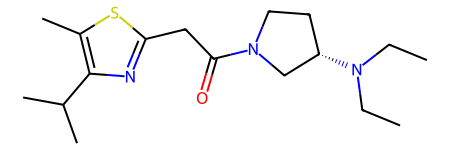

In [24]:
df_mB_temp['Molecule'][1]

In [25]:
#df_mB.head(2)

In [26]:
# 1. canonicalize smiles from Molecule

In [27]:
df_canon = df_mB

In [28]:
df_canon['smiles'] = df_canon['Molecule'].apply(Chem.MolToSmiles)

In [29]:
df_canon

,index,Id,smiles,sol_category,Molecule
0,0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,<rdkit.Chem.rdchem.Mol object at 0x1873886d0>
1,1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,<rdkit.Chem.rdchem.Mol object at 0x187388740>
2,2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,<rdkit.Chem.rdchem.Mol object at 0x1873887b0>
3,3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,<rdkit.Chem.rdchem.Mol object at 0x187388820>
4,4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,<rdkit.Chem.rdchem.Mol object at 0x187388890>
...,...,...,...,...,...
101013,30302,EOS97822,CN(C)CCN1CCC(CNCc2ccc(C#N)cc2)CC1,5,<rdkit.Chem.rdchem.Mol object at 0x187e9a430>
101014,30303,EOS97834,Cc1cn(C[C@H](O)CN2CCOCC2)c(=O)n1-c1ccccc1,5,<rdkit.Chem.rdchem.Mol object at 0x187e9a4a0>
101015,30304,EOS97889,Cc1ccc(C(=O)Nc2c(N3CCOCC3)nc(-c3ccccc3)[nH]c2=...,5,<rdkit.Chem.rdchem.Mol object at 0x187e9a510>
101016,30305,EOS97969,CC1Cc2cccc3c(O)c(C(=O)NCCCc4ccccc4)c(=O)n1c23,5,<rdkit.Chem.rdchem.Mol object at 0x187e9a580>


In [30]:
# 2. standardise molecules

In [31]:
df_standard = df_canon

In [32]:
# Standardazing Molecules
from rdkit.rdBase import BlockLogs
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
def transform(smiles, neutralize=True):
        mol = Chem.MolFromSmiles(smiles)
        block = BlockLogs() # Block all RDkit logging
        # Normalizing functional groups
        # https://molvs.readthedocs.io/en/latest/guide/standardize.html
        clean_mol = rdMolStandardize.Cleanup(mol) 
        # Get parents fragments
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
        # Neutralise
        if neutralize:
            uncharger = rdMolStandardize.Uncharger()
            uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
        else:
            uncharged_parent_clean_mol = parent_clean_mol
        del block # Release logging block to previous state
        return(uncharged_parent_clean_mol)

In [33]:
df_standard['Molecule'] = df_standard['smiles'].apply(transform)

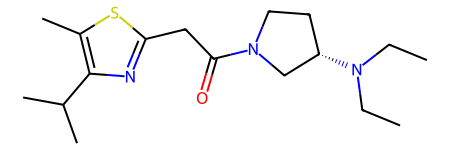

In [34]:
df_standard['Molecule'][1]

In [35]:
# 3. extract MorganFP

In [36]:
#df_MFP_test = df_standard.head(5)

In [37]:
#df_MFP_test

In [94]:
df_part = df_standard
df_part

,index,Id,smiles,sol_category,Molecule,MorganFP
0,0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a820>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
1,1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a890>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
2,2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a900>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
3,3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a970>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
4,4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a7b0>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
...,...,...,...,...,...,...
101013,30302,EOS97822,CN(C)CCN1CCC(CNCc2ccc(C#N)cc2)CC1,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f510>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
101014,30303,EOS97834,Cc1cn(C[C@H](O)CN2CCOCC2)c(=O)n1-c1ccccc1,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f580>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
101015,30304,EOS97889,Cc1ccc(C(=O)Nc2c(N3CCOCC3)nc(-c3ccccc3)[nH]c2=...,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f5f0>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
101016,30305,EOS97969,CC1Cc2cccc3c(O)c(C(=O)NCCCc4ccccc4)c(=O)n1c23,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f660>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."


In [95]:
MFP_df = pd.DataFrame()
for mol in df_part['Molecule']:
    MFP_vect = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=4096)]
    MFP_list = [list(l) for l in MFP_vect]
    MFP_df = pd.concat([MFP_df,pd.DataFrame(MFP_list)])

In [84]:
MFP_df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
MFP_df = MFP_df.reset_index(drop=True)
MFP_df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df_wMFP = pd.concat([df_MFP, MFP_df], axis=1)
df_wMFP

,index,Id,smiles,sol_category,Molecule,MorganFP,0,1,2,3,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a820>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a890>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a900>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a970>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a7b0>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101013,30302,EOS97822,CN(C)CCN1CCC(CNCc2ccc(C#N)cc2)CC1,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f510>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101014,30303,EOS97834,Cc1cn(C[C@H](O)CN2CCOCC2)c(=O)n1-c1ccccc1,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f580>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101015,30304,EOS97889,Cc1ccc(C(=O)Nc2c(N3CCOCC3)nc(-c3ccccc3)[nH]c2=...,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f5f0>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101016,30305,EOS97969,CC1Cc2cccc3c(O)c(C(=O)NCCCc4ccccc4)c(=O)n1c23,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f660>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df_wMFP = df_wMFP.drop(columns='MorganFP')
df_wMFP

,index,Id,smiles,sol_category,Molecule,0,1,2,3,4,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a820>,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a890>,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a900>,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a970>,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a7b0>,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101013,30302,EOS97822,CN(C)CCN1CCC(CNCc2ccc(C#N)cc2)CC1,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f510>,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101014,30303,EOS97834,Cc1cn(C[C@H](O)CN2CCOCC2)c(=O)n1-c1ccccc1,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f580>,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101015,30304,EOS97889,Cc1ccc(C(=O)Nc2c(N3CCOCC3)nc(-c3ccccc3)[nH]c2=...,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f5f0>,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101016,30305,EOS97969,CC1Cc2cccc3c(O)c(C(=O)NCCCc4ccccc4)c(=O)n1c23,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f660>,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#MFP_df = pd.DataFrame(MFP_list)
#MFP_df.shape
#MFP_df

In [72]:
df_MFP = df_standard

In [70]:
from rdkit.Chem import AllChem
import numpy as np
def MFP_generator(mol):
    MorganFP = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=4096)
    return MorganFP

In [74]:
df_MFP['MorganFP'] = df_MFP['Molecule'].apply(MFP_generator)
df_MFP['MorganFP'] = df_MFP['MorganFP'].apply(lambda x: np.reshape(x,(-1,1)))

In [75]:
df_MFP

,index,Id,smiles,sol_category,Molecule,MorganFP
0,0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a820>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
1,1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a890>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
2,2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a900>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
3,3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a970>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
4,4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,<rdkit.Chem.rdchem.Mol object at 0x188d4a7b0>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
...,...,...,...,...,...,...
101013,30302,EOS97822,CN(C)CCN1CCC(CNCc2ccc(C#N)cc2)CC1,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f510>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
101014,30303,EOS97834,Cc1cn(C[C@H](O)CN2CCOCC2)c(=O)n1-c1ccccc1,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f580>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
101015,30304,EOS97889,Cc1ccc(C(=O)Nc2c(N3CCOCC3)nc(-c3ccccc3)[nH]c2=...,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f5f0>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."
101016,30305,EOS97969,CC1Cc2cccc3c(O)c(C(=O)NCCCc4ccccc4)c(=O)n1c23,5,<rdkit.Chem.rdchem.Mol object at 0x189b1f660>,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."


In [42]:
# 4. calculate rdkit descriptors

In [ ]:
def rdkit_descriptor_calculator(df_in , add_logP = False, add_bpKa1 = False, add_bpKa2 = False):
    '''
    Calculates select RDKit descriptors for the molecules in the dataframe.
    Raises error if no SMILES column in present in the query dataframe.
    Parameters:
        1. df_in: query dataframe, where the SMILES column is expected to be present
        2. add_logP: boolean, if True, adds logP to the list of descriptors
        3. add_bpKa1: boolean, if True, adds bpKa1 to the list of descriptors
        4. add_bpKa2: boolean, if True, adds bpKa2 to the list of descriptors
    Returns:
        1. df: Pandas DataFrame of the calculated descriptors
    '''
    df_in = df_in.copy()
    #In past, I got NaNs with these descriptors, so I am not using them
    not_used_desc = ['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge','BCUT2D_MWHI',
    'BCUT2D_MWLOW','BCUT2D_CHGHI','BCUT2D_CHGLO','BCUT2D_LOGPHI','BCUT2D_LOGPLOW','BCUT2D_MRHI','BCUT2D_MRLOW']
    #Appending 'MolLogP' because we already have calculated logP using ChemAxon Marvin, and 'Ipc' as its value is too high
    not_used_desc.extend(['MolLogP', 'Ipc'])
    #used descriptors
    descriptors_list = [x for x in [x[0] for x in Chem.Descriptors.descList] if x not in not_used_desc]
    # Create a descriptor calculator with select descriptors
    desc_calc = MolecularDescriptorCalculator(descriptors_list)
    #Lower case all the column names of the dataframe
    df_in.columns = df_in.columns.str.lower()
    #Checking whether the SMILES column is present in the dataframe
    if('smiles' not in df_in.columns):
        raise ValueError('SMILES column not present in the dataframe')
    #Checking whether the Molecules column is present in the dataframe, if not present, adding it
    if('molecules' not in df_in.columns):
        df_in['molecules'] = df_in['smiles'].apply(lambda x: Chem.MolFromSmiles(x))
    desc = []
    #Looping over the molecules
    for mol in df_in['molecules']:
        desc.append(desc_calc.CalcDescriptors(mol))
    df_desc = pd.DataFrame(desc, columns = descriptors_list)
    #Adding logP and bpKa1 and bpKa2 if required
    if(add_logP):
        df_desc['logP'] = df_in['logp'].values
    if(add_bpKa1):
        df_desc['bpKa1'] = df_in['bpka1'].values
    if(add_bpKa2):
        df_desc['bpKa2'] = df_in['bpka2'].values
    return df_desc